# Final Project GEOG5543 Part 2 Machine Learning Method K Mean & DBSCAN 

This notebook will apply and compare the machine learning method k mean clustering algorithm and DBSCANE clustering method to find the interaction clustering pattern using the interaction data for five days(Monday to Friday) prepared in Part 1 (first notebook)

The results are mapped using folium map and two dropdown boxes(widget)

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns; sns.set()
import csv
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'

## K-Mean
For the comparison with DBSCAN, I use the number of clusters found in DBSCAN as the k value for each of the weekday in K Mean. 
Next is to use predefined function from sklearn library to compute the k-means clustering and add the assigned clustering label to the dataset. The top 5 cluster locations are found through using value_counts function and these locations are assigned with a specific color for mapping in folium. 


In [113]:
#These functions will be called inside the mapping part 

In [5]:
def readpt_kmean(num,cluster):
    num=str(num)
    df = pd.read_csv('Interaction_ByDOW_'+num+'.csv',encoding="ISO-8859-1")
    kmeans = KMeans(n_clusters = cluster, init ='k-means++')
    kmeans.fit(df[df.columns[2:4]]) # Compute k-means clustering
    df['cluster_label'] = kmeans.fit_predict(df[df.columns[2:4]])
    centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
    labels = kmeans.predict(df[df.columns[2:4]]) # Labels of each point
    return df


In [6]:
#function to assign color to top 5 most popular cluster location
def gettopten_kmean(df):
    count = df['cluster_label'].value_counts().index.tolist()
    countten=count[:5]
    topten=df[df['cluster_label'].isin(countten)]
    return topten

In [7]:
#function assigncolor take the dataframe and assign color to the clustered location based on the clustering label
def assigncolor_kmean(df):
    count = df['cluster_label'].value_counts().index.tolist()
    countten=count[:5]
    def colors_kmean(ten):
        if ten['cluster_label']==count[0]:
            return '#49006a'
        elif ten['cluster_label']==count[1]:
            return '#ae017e'
        elif ten['cluster_label']==count[2]:
            return '#dd3497'
        elif ten['cluster_label']==count[3]:
            return '#f768a1'
        elif ten['cluster_label']==count[4]:
            return '#fcc5c0'
    df['color'] = df.apply(colors_kmean, axis=1)
    return df
        

## DBSCAN

First step is to define two parameters, a physical distance from each point (epsilon), and a minimum cluster size (min_samples). 
Min samples is set to 1 so that every data point gets assigned to either a cluster or forms its own cluster of 1 because I will only use and visualize the top 5 clustering location for the results. 
A Silhouette Score always ranges between -1 to 1. A high Silhouette score suggests that the objects are well matched to their own cluster and poorly matched to their neighborhood clusters. For this project, I used Silhouette distance to find the ideal epsilon value for DBSCAN through finding the minimum distance between points and plotting the minimum distance to find the density of the data points. The plots suggest that the optimal epsilon value is in the range between 0 to 10. Therefore, I first test the silhouette score using various possible epsilon value between 0.5 to 2 and try to select the best value with highest silhouette score. Based on the test, a epsilon value of 1 gives highest silhouette score.

After the parameters are defined, dbscan is run with predefined functions from sklearn library.  “ball tree” algorithm and haversine metric is used to run the DBSCAN and generate cluster label for each trip records in the data. The top 5 cluster locations are found through using value_counts function and these locations are assigned with a specific color for mapping in folium. 


### Define Parameters

Number of clusters: 510


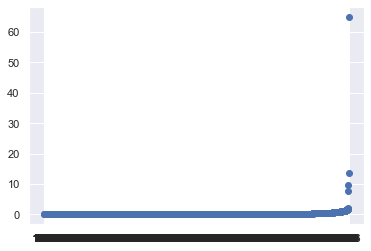

Considering mindistance between 0.5 to 2


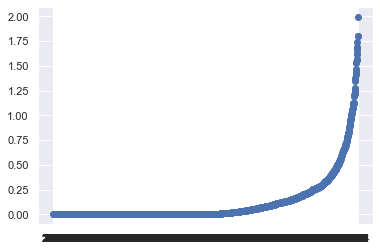

In [190]:
df = readpt_dbscan(0)
df=df[["DLAT","DLON"]]
df=df.sort_values(by=['DLAT','DLON'])
df2=pd.DataFrame(columns=['index','distance'])
for i in range(0,len(df)-1):
    dist=np.linalg.norm(df.iloc[i]-df.iloc[i+1])
    df2=df2.append({'index': str(i),'distance':dist},ignore_index=True)
    
df2=df2.sort_values(by=['distance'])
plt.scatter(df2['index'],df2['distance'])
plt.show()
print("Considering mindistance between 0.5 to 2")
df3 = df2[df2['distance']<2]
df3=df3.sort_values(by=['distance'])
plt.scatter(df3['index'],df3['distance'])
plt.show()

In [191]:
range_eps=[0.1,0.5,0.6,0.7,0.8,0.9,1,1.5,2]
for i in range_eps:
    print('eps value is' +str(i))
    db = DBSCAN(eps=i,min_samples=1).fit(df)
    core_sample_mask=np.zeros_like(db.labels_,dtype=bool)
    core_sample_mask[db.core_sample_indices_] = True
    labels=db.labels_
    print(set(labels))
    silhouette_avg=silhouette_score(df,labels)
    print("For eps value =" + str(i),labels,
         "The average silhouette_score is:", silhouette_avg
         
         )

eps value is0.1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56}
For eps value =0.1 [ 0  1  2 ... 55 55 56] The average silhouette_score is: 0.3099706403240746
eps value is0.5
{0, 1, 2, 3, 4, 5, 6}
For eps value =0.5 [0 1 2 ... 5 5 6] The average silhouette_score is: 0.7513297886766397
eps value is0.6
{0, 1, 2, 3, 4, 5, 6}
For eps value =0.6 [0 1 2 ... 5 5 6] The average silhouette_score is: 0.7513297886766397
eps value is0.7
{0, 1, 2, 3, 4, 5, 6}
For eps value =0.7 [0 1 2 ... 5 5 6] The average silhouette_score is: 0.7513297886766397
eps value is0.8
{0, 1, 2, 3, 4, 5}
For eps value =0.8 [0 1 2 ... 4 4 5] The average silhouette_score is: 0.7652606964369788
eps value is0.9
{0, 1, 2, 3, 4}
For eps value =0.9 [0 1 2 ... 3 3 4] The average silhouette_score is: 0.931234363911751
eps value is1
{0, 1, 2, 3, 4}
For eps value =

### Function to Read the Data 


    Monday - 0
    Tuesday - 1
    Wednesday - 2
    Thursday - 3
    Firday - 4
    
These functions will be called inside the mapping part 

In [11]:
#function readpt_dbscan take a number from 0 to 4 and read the corresponding data and run the DBSCAN on the data

def readpt_dbscan(num):
    num=str(num)
    df4 = pd.read_csv('Interaction_ByDOW_'+num+'.csv',encoding="ISO-8859-1")
    coords = df4[['DLAT', 'DLON']].values
    kms_per_radian = 6371.0088
    epsilon = 1/ kms_per_radian
    db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    df4["Label"] = db.labels_
    cluster_labels= db.labels_
    num_clusters = len(set(cluster_labels))
    return df4
 

In [12]:
#replace the number inside ()to find the number of cluster found in DBSCAN
d = readpt_dbscan(4)
count = d['Label'].value_counts()
#count

In [13]:
#to find the number of outliers
count=0
for idx, name in enumerate(d['Label'].value_counts().index.tolist()):
    if d['Label'].value_counts()[idx] ==1:
        count +=1
       # print('Name:',name)
        #print('Counts:',d['Label'].value_counts()[idx])
print("Number of outliers:",count)

Number of outliers: 184


Number of clusters for K Mean(total number of cluster - total number of outliers from DBSCAN)

    0 : 510 - 184 = 326
    1 : 517 - 192 = 325
    2 : 443 - 190 = 253
    3 : 442 - 216 = 226
    4 : 410 - 184 = 226

Number of outliers found:

    0 - 184,
    1 - 192,
    2 - 190,
    3 - 216,
    4 - 184,

### Function to Get the Top 5 Clustering Location
function gettopten take the dataframe(after DBSCAN) and find the top 5 most clustered location

In [14]:
#function gettopten take the dataframe(after DBSCAN) and find the top 5 most clustered location
def gettopten_dbscan(df):
    count = df['Label'].value_counts().index.tolist()
    countten=count[:5]
    topten=df[df['Label'].isin(countten)]
    return topten

### Function to Assign Color to Each Location
function assigncolor take the dataframe and assign color to the clustered location based on the clustering label

In [15]:
#function assigncolor take the dataframe and assign color to the clustered location based on the clustering label
def assigncolor_dbscan(df):
    count = df['Label'].value_counts().index.tolist()
    countten=count[:5]
    def colors_dbscan(ten):
        if ten['Label']==count[0]:
            return '#49006a'
        elif ten['Label']==count[1]:
            return '#ae017e'
        elif ten['Label']==count[2]:
            return '#dd3497'
        elif ten['Label']==count[3]:
            return '#f768a1'
        elif ten['Label']==count[4]:
            return '#fcc5c0'
    df['color'] = df.apply(colors_dbscan, axis=1)
    return df

## Function to Create Folium Map 


The last step is to map the results using folium map and implement a dropdown box for user to choose which method and day to display. 
A default map is defined with set width and height, and a default location in Minneapolis area with a zoom start of 12. Folium.circle is used to map the latitude and longitude of the points with its assigned color to indicate clustering. 

A method event handler is built to create the method dropdown box so that user could choose which machine learning method they want to apply. Day event handler is nested inside the method event handler for user to choose which day from Monday to Friday they want to display on the map. User’s selection will trigger the map function to be called so that a point map will be displayed with the corresponding selected machine learning method and day.








In [16]:
import folium
#create a map

# map_pt function take the dataframe with clustering labels and assigned color and map out all the points
def map_pt(num,method):
    #create default map
    this_map = folium.Map(width=700,height=400,location=[44.97400, -93.22769],tiles='cartodbpositron', zoom_start=12)
    def plotDot(point):
        folium.Circle(location=[point.DLAT, point.DLON],
                            radius=2,
                            weight=5, color=point.color).add_to(this_map)
    #if dbscan is selected, call the functions to run dbscan and map the top 5 locations in folium map
    if method == "dbscan":
        df=readpt_dbscan(num)
        topten= gettopten_dbscan(df)
        topten=assigncolor_dbscan(topten)
        topten.apply(plotDot, axis = 1)
    
    #if kmean is selected, call the readpt_kmean function with assined number of cluster value based on the day to run kmean
    elif method == "kmean":
        if num == 0:
            df=readpt_kmean(num, 326)
        elif num == 1:
            df=readpt_kmean(num, 325)
        elif num == 2:
            df=readpt_kmean(num, 253)
        elif num == 3:
            df=readpt_kmean(num, 226)
        elif num == 4:
            df=readpt_kmean(num, 226)
        # call the functions to map the top 5 locations in folium map
        topten= gettopten_kmean(df)
        topten=assigncolor_kmean(topten)
        topten.apply(plotDot, axis = 1)

    this_map.fit_bounds(this_map.get_bounds()) #Set the zoom to the maximum possible
    return this_map

#Save the map to an HTML file
#this_map.save('html_map_output/simple_dot_plot.html')


## Dropdown Box Widget Implementation

In [17]:
#Import the Libraries
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [18]:
#Set the default map
m = folium.Map(width=700,height=400,location=[44.97400, -93.22769],tiles='cartodbpositron', zoom_start=12)


#function day_eventhandler1 and day_eventhandler1 is nested inside method eventhandler 
#and it take selection(Monday to Friday) from user 

def method_eventhandler(Method):
    control = Method
    if control == 'K-Mean':
        interact(day_eventhandler1,Weekday = widgets.Dropdown(
        options = ['Please select','Monday', 'Tuesday','Wednesday','Thursday','Friday'],
        disabled = False
        ))        
    elif control == 'DBSCAN':
        interact(day_eventhandler2,Weekday = widgets.Dropdown(
        options = ['Please select','Monday', 'Tuesday','Wednesday','Thursday','Friday'],
        disabled = False
        ))
    else:
        display(m) #if nothing is selected, display the default map m
        
        
def day_eventhandler1(Weekday):
    control = Weekday
    #dispaly the map for selected day for kmean
    if control == 'Monday':
        display(map_pt(0,"kmean"))
    
    elif control == 'Tuesday':
        display(map_pt(1,"kmean"))
    elif control == 'Wednesday':
        display(map_pt(2,"kmean"))
    elif control == 'Thursday':
        display(map_pt(3,"kmean"))
    elif control == 'Friday':
        display(map_pt(4,"kmean"))
    else:
        display(m)
        
def day_eventhandler2(Weekday):
    control = Weekday
    #dispaly the map for selected day for dbscan
    if control == 'Monday':
        display(map_pt(0,'dbscan'))
    elif control == 'Tuesday':
        display(map_pt(1,'dbscan'))
    elif control == 'Wednesday':
        display(map_pt(2,'dbscan'))
    elif control == 'Thursday':
        display(map_pt(3,'dbscan'))
    elif control == 'Friday':
        display(map_pt(4,'dbscan'))
    else:
        display(m)
     
    
#initial the method eventhandler and the method dropdown box will show before the day dropdown box
interact(method_eventhandler,Method = widgets.Dropdown(
    options = ['Please Select','DBSCAN','K-Mean'],
    disabled = False
))





interactive(children=(Dropdown(description='Method', options=('Please Select', 'DBSCAN', 'K-Mean'), value='Ple…

<function __main__.method_eventhandler(Method)>

In [13]:
#from sklearn import metrics

#df4 = readpt(0)

#

In [16]:
#df = pd.DataFrame()
#df['Label'] = df4['Label']

In [18]:
#metrics.silhouette_score(df, df['Label'])
#looks like a very good score! the best is 1 and the worst is -1

0.9230447511501464